# **Appendix 1 - Preliminary analysis**

In [ ]:
!pip install pandas numpy seaborn matplotlib

**Load and Clean the Data**

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files

# Load the dataset
df = pd.read_csv("cstads_2122_pumf.csv")

# Dataset overview
print("Original DataFrame:\n")
print(df.shape)
df.describe()
df.info()

# Check the first few rows
print("\n", df.head())

# Remove duplicates if any
df = df.drop_duplicates()

# Standardize categorical values (example: converting 'Male'/'M' variations)
df['DVGENDER'] = df['DVGENDER'].replace({1: 'Female', 2: 'Male'})
df['DVURBAN'] = df['DVURBAN'].replace({1: 'Urban', 2: 'Rural'})
df['PROVID'] = df['PROVID'].replace({10: 'NL', 11: 'PEI', 12: 'NS', 24: 'QC', 35: 'ON', 46: 'MN', 47: 'SK', 48: 'AB', 59:'BC'})

# Identify missing values
df.replace({96: pd.NA, 98: pd.NA, 99: pd.NA, 996: pd.NA, 999: pd.NA}, inplace=True)
print("\nMissing Values:\n", df.isnull().sum())

# Calculate the percentage of missing values per column
missing_percentage = df.isnull().mean() * 100

# Drop columns with more than 75% missing values
df_cleaned = df.loc[:, missing_percentage <= 75]

# Cleaned dataset overview
print("\nCleaned DataFrame (columns with more than 75% missing values removed):\n")
print(df_cleaned.shape)
df_cleaned.describe()
df_cleaned.info()

# Check the first few rows
print("\n", df_cleaned.head())

# Identify missing values
print("\nMissing Values:\n", df_cleaned.isnull().sum())

# Move cleaned dataframe to df for convenience
df = df_cleaned

Original DataFrame:

(61096, 168)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61096 entries, 0 to 61095
Columns: 168 entries, SEQID to DVAVCIGD
dtypes: float64(1), int64(167)
memory usage: 78.3 MB

    SEQID  PROVID  GRADE  DVGENDER  DVURBAN  DVRES  DVORIENT  DVDESCRIBE  \
0  18338      11      9         2        1      3         2           1   
1  16111      24     10         1        1      1         2           4   
2  20587      10      7         2        1      1         2           1   
3  54568      12      8        99        2      1         1           1   
4  40991      10      7         1        2      1         2           1   

      WTPUMF  GH_010  ...  BUL_100  BUL_110  BUL_120  DVTY1ST  DVTY2ST  \
0   1.164716       2  ...        2        2        4        3        7   
1  36.141169       3  ...        2        2        1        3        7   
2   1.448578       2  ...        2        2        1        3        7   
3   3.036660       4  ...        2        2     

**Generate Summary Statistics**

In [46]:
# Summary statistics for numerical variables
print("Summary Statistics:\n", df.describe())

# Count unique values for categorical variables
print("\nCategorical Data Distribution:\n", df[['DVGENDER']].apply(pd.Series.value_counts))
print("\n", df[['PROVID']].apply(pd.Series.value_counts))
print("\n", df[['GRADE']].apply(pd.Series.value_counts))
print("\n", df[['DVURBAN']].apply(pd.Series.value_counts))

Summary Statistics:
               GRADE        WTPUMF
count  61096.000000  61096.000000
mean       9.141548     35.353820
std        1.622969     56.903468
min        7.000000      0.507389
25%        8.000000      6.075865
50%        9.000000     25.260619
75%       10.000000     38.635371
max       12.000000   1561.260211

Categorical Data Distribution:
           DVGENDER
DVGENDER          
Male         28903
Female       27168

         PROVID
PROVID        
QC       10863
AB        9260
NL        7032
NS        6999
BC        6885
ON        6745
SK        5596
PEI       4616
MN        3100

        GRADE
GRADE       
8      12500
7      12436
9      11055
10     10218
11      8859
12      6028

          DVURBAN
DVURBAN         
Urban      49577
Rural      11519


**Perform Correlation Analysis**

In [47]:
import re

# Define the prefixes to exclude
exclude_prefixes = ["UND", "MET", "XTC", "HAL", "HER", "COC", "SYN", "BZP", "TNB", "TRP", "GLU", "SAL",
                    "SLP", "STI", "DEX", "GRV", "SED", "POLY", "PH", "DR", "BEH", "BUL"]

# Create a regex pattern to match column names starting with these prefixes
pattern = re.compile(r'^(?:' + '|'.join(exclude_prefixes) + r').*')

# Identify columns to drop
columns_to_drop = [col for col in df.columns if pattern.match(col)]

# Drop the unwanted columns
df_filtered = df.drop(columns=columns_to_drop)

# Print the removed columns
print("Removed columns:", columns_to_drop)

# Remaining dataset overview
print("\nCleaned DataFrame (columns not associated with smoking/alcohol/cannabis removed):\n")
print(df_filtered.shape)
df_filtered.describe()
df_filtered.info()

# Move cleaned dataframe to df for convenience
df = df_filtered

Removed columns: ['UND_010', 'UND_020', 'MET_010', 'XTC_010', 'HAL_010', 'HER_010', 'COC_010', 'SYN_010', 'BZP_010', 'TNB_010', 'TRP_010', 'GLU_010', 'SAL_010', 'SLP_010', 'STI_030', 'DEX_010', 'GRV_010', 'STI_080', 'STI_050', 'SED_050', 'SED_030', 'POLY_010', 'POLY_020', 'POLY_030', 'POLY_040', 'POLY_050', 'POLY_060', 'POLY_070', 'POLY_080', 'POLY_090', 'POLY_100', 'POLY_110', 'POLY_120', 'POLY_130', 'POLY_140', 'POLY_150', 'POLY_160', 'POLY_170', 'POLY_180', 'PH_010', 'PH_020', 'PH_030', 'PH_040', 'PH_051', 'PH_061', 'PH_052', 'PH_062', 'PH_110', 'PH_120', 'PH_070', 'PH_080', 'PH_130', 'PH_140', 'PH_090', 'PH_100', 'MET_030', 'XTC_030', 'HAL_030', 'COC_030', 'STI_070', 'DR_010', 'DR_020', 'DR_060', 'DR_070', 'BEH_010', 'BEH_020', 'BEH_030', 'BEH_040', 'BUL_010', 'BUL_020', 'BUL_030', 'BUL_040', 'BUL_050', 'BUL_060', 'BUL_070', 'BUL_080', 'BUL_090', 'BUL_100', 'BUL_110', 'BUL_120']

Cleaned DataFrame (columns not associated with smoking/alcohol/cannabis removed):

(61096, 58)
<class '

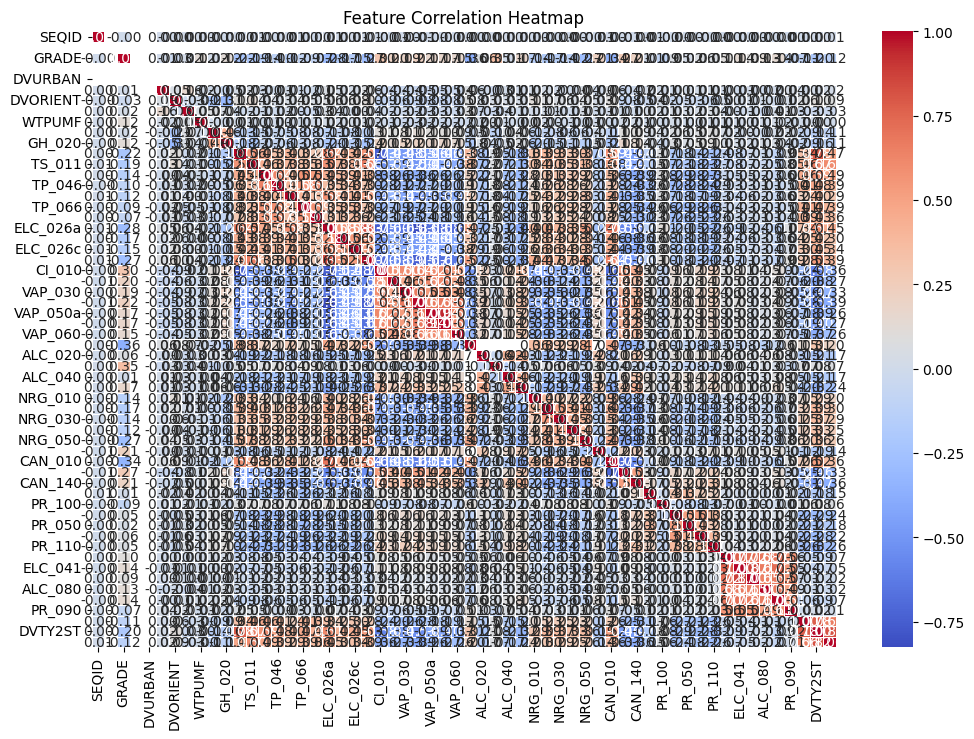

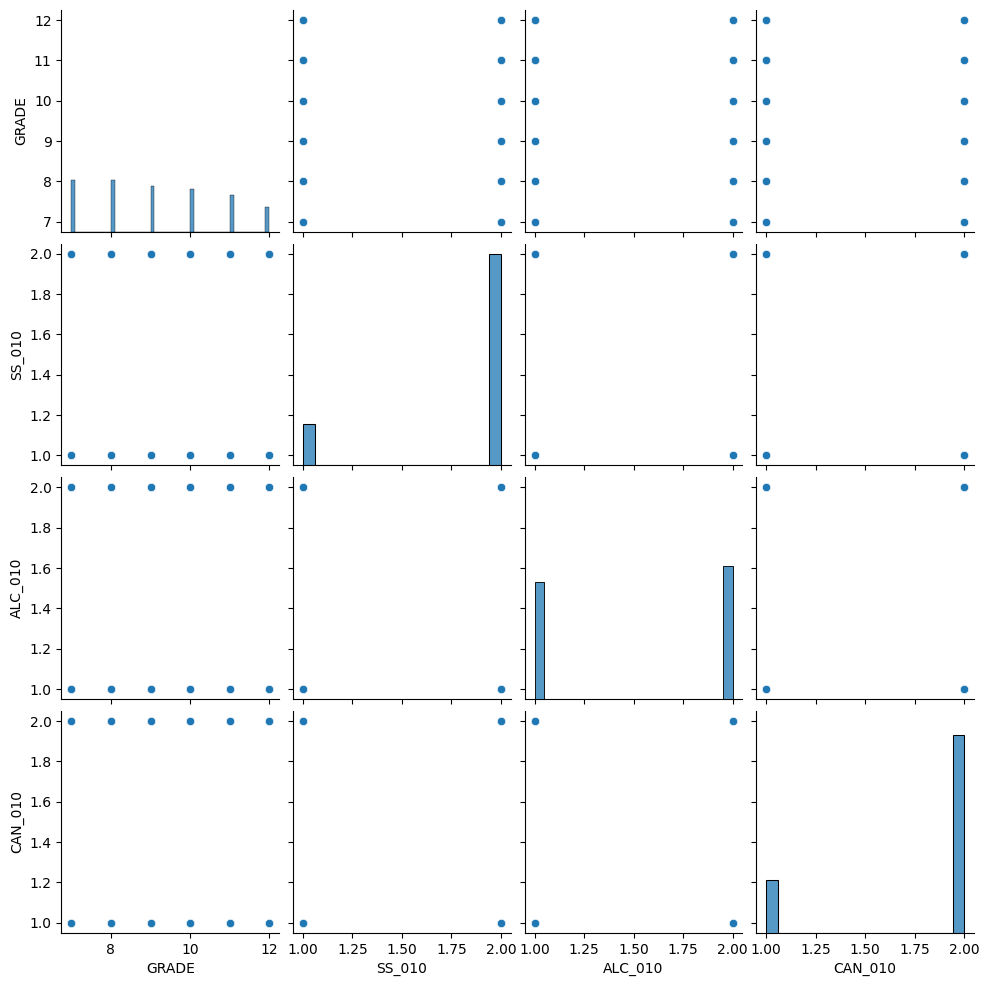

In [48]:
# Compute the correlation matrix
# Convert columns to numeric, errors='coerce' will handle non-numeric values
correlation_matrix = df.apply(pd.to_numeric, errors='coerce').corr()

# Heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Pairplot for key variables
# Convert columns to numeric for pairplot as well
sns.pairplot(df[['GRADE', 'SS_010', 'ALC_010', 'CAN_010']].apply(pd.to_numeric, errors='coerce'))
plt.show()

**Initial Findings**

In [50]:
# Print key findings
print("\nKey Findings:")

# Most common province
most_common_province = df['PROVID'].mode()[0]
print(f"- Most responses are from {most_common_province}")

# Most frequently used substance
most_used_substance = df[['SS_010', 'ALC_010', 'CAN_010']].mean().idxmax()
print(f"- The most commonly used substance is {most_used_substance}")

# Highest correlation
strongest_corr = correlation_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates().iloc[1:2]
print(f"- Strongest correlation found: {strongest_corr}")



Key Findings:
- Most responses are from QC
- The most commonly used substance is SS_010
- Strongest correlation found: VAP_050b  VAP_050a    0.941479
dtype: float64
